# KIN 482D: Computational modeling of human sensorimotor control and learning

## Appendix C: Model Fitting and Model Comparison

## Goals of this section

- Learn how to fit a model to data (i.e., "fit the parameters of a model to data")
- Effectively, this means adjusting the model's unknown parameters (such as $\sigma_\text{sensed}$ from Kording & Wolpert 2004) so that the data are accounted for as well as possible
- We'll learn the most popular method of parameter fitting, called "maximum likelihood estimation (MLE)"
    - Mathematically the same as when we discussed MLE in the context of different estimates, or estimators
    - Conceptually, we're now talking about using MLE to figure out which parameter values make the observed data (i.e., responses) most probable
    - MLE is used for many types of models, not just Bayesian
    - Also, we could fit Bayesian models with Bayesian estimation/statistics, but that is outside the scope of this class
    - We'll learn that the MLE is the same as the MAP when assuming flat priors


## What is a model?

- We can define a model of behavior as a response distribution:

$$p(\text{subject response}|\text{stimuli})$$

Of course, there are all of the other underlying parts that get us to the response distribution as well...

## Free parameters

- **parameters:** variables of unknown value that are assumed to be constant throughout an experiment
    - Represent properties or beliefs that may differ between subjects
    - Examples: sensory noise level ($\sigma$), assumed prior mean ($\mu_{\text{prior}}$)
    - Set of free parameters of a model is collectively represented by $\theta$ (sometimes also see capital theta, $\Theta$)
    - Model itself is represented by $M$
    - We make the dependence of the response distribution on the parameters and the model explicit by writing $p(\text{subject response} | \text{stimuli}; \theta, M)$
    - Here, semicolon serves to separate variables that vary from trial to trial (response and stimuli) from the model identity and model parameters, which do *not* vary from trial to trial

## The parameter likelihood

- The goal in **model fitting/parameter fitting/parameter estimation** is to try to find the parameter values that best describe the data
- **Maximum likelihood estimation** is the approach you will learn for parameter estimation  
&nbsp;  


$$\mathscr{L}_M(\theta;\text{data}) = p(\text{subject responses across all trials} \mid \text{stimuli across all trials}; \theta, M)$$

&nbsp;

***The likelihood of a parameter combination, $\theta$, is high when (the model with) that parameter combination (applied to the stimuli experienced by the subject) would often produce the subject responses.*** 

**Whiteboard.**



## Conditional independence of observations

$$\mathscr{L}_M(\theta;\text{data}) = \prod_{i=1}^{n_{\text{trials}}} p(\text{subject responses across all trials} \mid \text{stimuli across all trials}; \theta, M)$$

- We assume each observation is independent of all others and that all observations come from same distribution
- Sometimes this property is referred to as I.I.D. - independent and identically distributed


## Maximum-likelihood estimation (MLE)

- MLE of the parameters $\theta$ means finding the values of $\theta$ such that $\mathscr{L}_M(\theta ; \text{data})$ is highest. In other words, what parameter values maximize the probability of your data. 

- Typically, when we write code to perform MLE, we maximize the $\text{log} \left( \mathscr{L}_M(\theta ; \text{data}) \right)$

- This is because when you multiply lots of small values (like probabilities), you can run into the problem of "underflow", which is when values become smaller than what a programming language/computer is capable of representing. 

- Taking the log has several advantages: 
    - Maximizing $\mathscr{L}_M(\theta ; \text{data})$ is equivalent to maximizing $\text{log} \left[ \mathscr{L}_M(\theta ; \text{data}) \right]$
    - Multiplication becomes addition: $\text{log}(a \cdot b) = \text{log}(a) + \text{log}(b)$
    - $\text{log}(p)$ values scale to be between $(-\infty, 0]$, so you avoid underflow

<center><img src="images/figC-1.png" width=800></center>

*\*"brain" in the figure refers to the subject's brain*

## Maximum-likelihood estimation (MLE)

- MLE is equivalent to Bayesian parameter estimation using uniform priors over parameter values
- Authors state that use of priors (to be fully Bayesian in our parameter estimation) is not necessary as long as the data set is sufficiently large (many trials) and there are sufficiently few parameters -- why? 
- Covering the use of priors in *parameter estimation* and computing full probability distributions for these parameter estimates is beyond the scope of the book and this course.

**Whiteboard (starting with C.5.1 Simple Model)**
    

## Fitting data from an estimation task

First, fit with a simple model in which the observer does not use a prior and simply reports the measurement. That is, $\hat{s} = x$ and distribution of $p(\hat{s}|s, \sigma) \sim N(s, \sigma^2)$.

**Go to the board.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "retina"

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Data for estimation task: 's' is true stim location; 's_hat' is observer's estimates
s = np.array([1.61, 5.50, -6.78, 2.59, 0.96, -3.92, -1.30, 1.03, 10.74, 8.31, 
              -4.05, 9.10, 2.18, -0.19, 2.14]) 
s_hat = np.array([0.37, 1.62, -1.17, 1.66, 1.17, -0.79, -1.14, 0.76, 4.31, 
                2.86, -0.61, 3.25, 0.48, 0.12, 0.18]) 

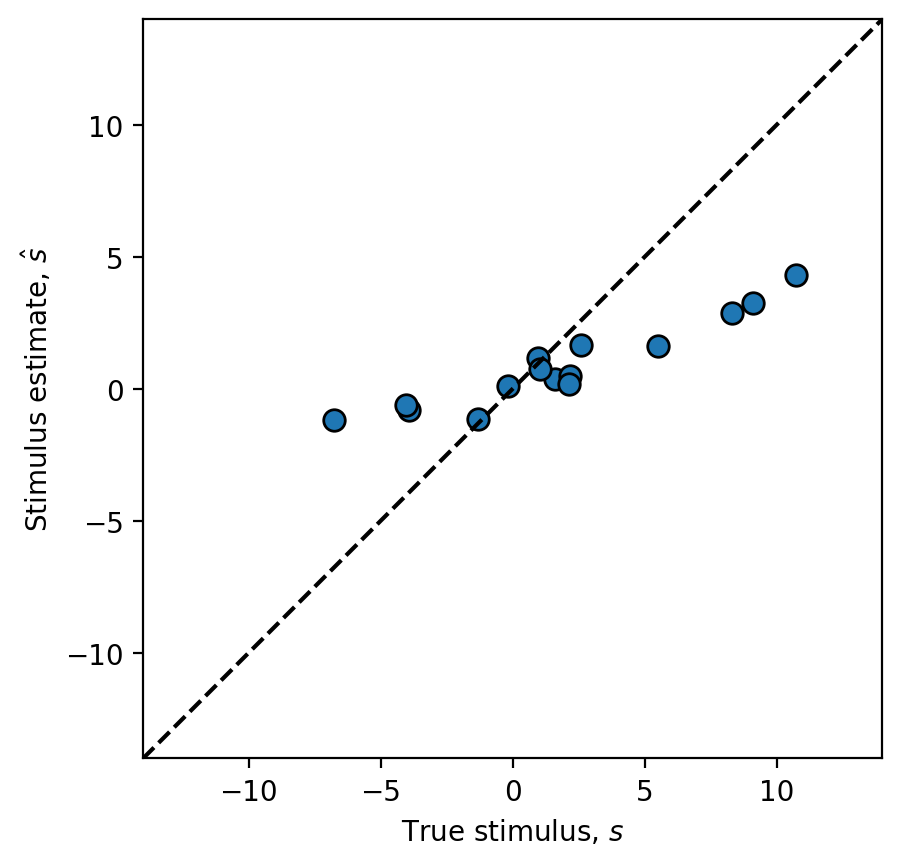

In [3]:
# Plot the data
lb, ub = [-14, 14]  # axes boundaries

# Set-up your figure axis object
fig, ax = plt.subplots()
ax.plot(
    np.arange(lb, ub + 0.1, 0.5), 
    np.arange(lb, ub + 0.1, 0.5),
    color='k',
    linestyle="--")
ax.scatter(s, s_hat, edgecolor='k', s=60)
ax.set(xlim=[lb, ub], ylim=[lb, ub], xlabel="True stimulus, $s$", \
       ylabel="Stimulus estimate, $\hat{s}$")
ax.set_box_aspect(1)  # Make axes square
plt.show() 

### Finding best-fit parameter using grid search

**Whiteboard.** 

Example code will be provided. 

---
## Model Comparison (Selection)

- How do we know which model fits the data best? That is, how can we use the $\mathscr{L}^*$ (maximum log-likelihood) of different models to objectively compare them? 
- The issue is that you have to consider both how well a model fits your data *and* how complex it is? An overly complex model may fit your data great, but that doesn't mean it can make accurate predictions.
- Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are two of the most popular metrics of model quality&mdash;both take into account the fit ($\mathscr{L}^*$) and complexity (the number of free parameters)

\begin{align}
\text{AIC} &= -2(\log\mathscr{L}^* - n_{\text{parameters}}) \\
\text{BIC} &= -2\left(\log\mathscr{L}^* - \dfrac{\log n_{\text{trials}}}{2} n_{\text{parameters}}\right) \
\end{align}

- The model with the lowest AIC or BIC value is considered the best
- Note that it is the relative magnitudes of these scores that matter (i.e., which model has the lowest AIC/BIC) and not the aboslute magnitudes 
- Practical advice: You can compute both AIC and BIC scores when you do model selection; if they disagree, then you have to question how much better one model is than another

- Minor note: The $-2$ in front is so that for Gaussian likelihoods, the leading term (ignoring the normalizing constant) turns into the sum of squared errors

### Cross-validation

- Conceptually different: Here we are concerned with the accuracy (or, log-likelihood) of model when tested on "out-of-sample" (test) data
- Bread and butter method within Machine Learning
- Divide data into *K* folds that are statistically equivalent (no systematic differences between data in each fold)
- Figure below illustrates 5-fold CV

<center><img src="images/cross-validation.png" width=800></center>

## Parameter Recovery and Model Recovery

- Simulate data with your models
- Then, fit your simulated data with your models
- **The model that generated the data should be able to fit the data well!**
    - More specifically, the MLE of the parameters should be very close to the ones used to create the fake data
- Formal model comparison should show that the model which generated the fake data is also the best model 
- The Wilson & Collins (2019) article is a great overview of these steps that goes into much greater detail!

## Helpful hint for Problem 4.17

<center><img src="images/fig-4-17-i.png" width 1500></center>

## For next class

- Submit your assignment over the weekend
- Read Chapter 5 and Ernst & Banks (2002) - covers the Swiss Army knife of Bayesian models (cue combination)